In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM , Dense , GRU, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
import os
directories = [
    "/Users/evangelosgeraridis/Desktop/MEAZON/September 2022",
    "/Users/evangelosgeraridis/Desktop/MEAZON/October 2022"
]

dataframes = {}

for directory in directories:
    files = os.listdir(directory)
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)
            dataframes[file] = df
            


fridge_data = pd.concat([dataframes['fridgeS.csv'], dataframes['fridgeO.csv']], ignore_index=True)
aggregated_data = pd.concat([dataframes['AggregatedS.csv'], dataframes['AggregatedO.csv']], ignore_index=True)
dishwasher_data = pd.concat([dataframes['dishwasherS.csv'], dataframes['dishwasherO.csv']], ignore_index=True)
hotplate_data = pd.concat([dataframes['hotplateS.csv'], dataframes['hotplateO.csv']], ignore_index=True)
microwave_data = pd.concat([dataframes['microwaveS.csv'], dataframes['microwaveO.csv']], ignore_index=True)
washing_machine_data = pd.concat([dataframes['washing_machineS.csv'], dataframes['washing_machineO.csv']], ignore_index=True)
water_heater_data = pd.concat([dataframes['water_heaterS.csv'], dataframes['water_heaterO.csv']], ignore_index=True)

data_list = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]

for i in range(len(data_list)):
    data_list[i] = aggregated_data.merge(data_list[i], on='ts')
    data_list[i] = data_list[i].set_index('ts')
    data_list[i] = data_list[i].dropna()

fridge_data = pd.DataFrame(data_list[0].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'fridge_active_power', 'apwrA_y': 'fridge_apparent_power', 'curA_y': 'fridge_current', 'vltA_y': 'fridge_voltage', 'screA_y': 'fridge_crest_factor'}))
dishwasher_data = pd.DataFrame(data_list[1].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'dishwasher_active_power', 'apwrA_y': 'dishwasher_apparent_power', 'curA_y': 'dishwasher_current', 'vltA_y': 'dishwasher_voltage', 'screA_y': 'dishwasher_crest_factor'}))
hotplate_data = pd.DataFrame(data_list[2].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'hotplate_active_power', 'apwrA_y': 'hotplate_apparent_power', 'curA_y': 'hotplate_current', 'vltA_y': 'hotplate_voltage', 'screA_y': 'hotplate_crest_factor'}))
microwave_data = pd.DataFrame(data_list[3].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'microwave_active_power', 'apwrA_y': 'microwave_apparent_power', 'curA_y': 'microwave_current', 'vltA_y': 'microwave_voltage', 'screA_y': 'microwave_crest_factor'}))
washing_machine_data = pd.DataFrame(data_list[4].rename(columns={'pwrA_x': 'aggregated_active_power', 'apwrA_x': 'aggregated_apparent_power','curA_x': 'aggregated_current','vltA_x': 'aggregated_voltage', 'screA_x': 'aggregated_crest_factor', 'pwrA_y': 'washing_machine_active_power', 'apwrA_y': 'washing_machine_apparent_power', 'curA_y': 'washing_machine_current', 'vltA_y': 'washing_machine_voltage', 'screA_y': 'washing_machine_crest_factor'}))
water_heater_data = pd.DataFrame(data_list[5].rename(columns={'pwrA': 'aggregated_active_power', 'apwrA': 'aggregated_apparent_power','curA': 'aggregated_current','vltA': 'aggregated_voltage', 'screA': 'aggregated_crest_factor', 'pwrC': 'water_heater_active_power', 'apwrC': 'water_heater_apparent_power', 'curC': 'water_heater_current', 'vltC': 'water_heater_voltage', 'screC': 'water_heater_crest_factor'}))


modified_dataframes = [fridge_data, dishwasher_data, hotplate_data, microwave_data, washing_machine_data, water_heater_data]

for df in modified_dataframes:
    print(df)
    print(df.info())


               aggregated_active_power  aggregated_apparent_power   
ts                                                                  
1662048942628                   33.136                     66.092  \
1662059291370                   34.121                     66.943   
1662059293620                   33.852                     67.077   
1662059293670                   33.807                     67.122   
1662059293720                   33.763                     67.077   
...                                ...                        ...   
1665728021166                   34.121                     65.420   
1665728021216                   34.076                     65.555   
1665728021266                   33.897                     65.644   
1665728021316                   33.673                     65.555   
1665766352306                  140.602                    155.514   

               aggregated_current  aggregated_voltage   
ts                                           

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


class Hart85:
    def __init__(self, num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5):
        self.num_states = num_states
        self.num_cluster_init = num_cluster_init
        self.num_cycles_init = num_cycles_init
        self.num_cluster = num_cluster
        self.model = None

    def train(self, X):
        X = self.create_input(X)
        self.model = self.train_hart85(X)
        return self.model

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def train_hart85(self, X):
        num_samples, num_features = X.shape
        X_states = np.zeros((num_samples, num_features))
        means = KMeans(n_clusters=self.num_cluster_init).fit(X).cluster_centers_
        knn = NearestNeighbors(n_neighbors=self.num_cluster_init).fit(X)
        for i in range(num_samples):
            _, indices = knn.kneighbors([X[i]])
            for j in range(self.num_cycles_init):
                for k in range(num_features):
                    if j < len(indices[0]):
                        if indices[0][j] < len(means):
                            X_states[i, k] = means[indices[0][j]][k]
        return X_states

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        n_cycles = self.num_cluster // self.num_cycles_init
        Y = np.zeros((n_samples, n_features * n_cycles))
        means = KMeans(n_clusters=self.num_cluster).fit(X_agg).cluster_centers_
        knn = NearestNeighbors(n_neighbors=self.num_cluster).fit(X_agg)
        for i in range(n_samples):
            _, indices = knn.kneighbors([X_agg[i]])
            for j in range(n_cycles):
                for k in range(self.num_cycles_init):
                    if indices[0][j * self.num_cycles_init + k] < len(means):
                        Y[i, j * self.num_cycles_init + k] = means[indices[0][j * self.num_cycles_init + k]][k]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

    
aggregated_features = ['aggregated_active_power', 'aggregated_apparent_power', 'aggregated_current', 'aggregated_voltage', 'aggregated_crest_factor']
fridge_features = ['fridge_active_power', 'fridge_apparent_power','fridge_current', 'fridge_voltage', 'fridge_crest_factor']
washing_machine_features = ['washing_machine_active_power', 'washing_machine_apparent_power', 'washing_machine_current','washing_machine_voltage','washing_machine_crest_factor']
microwave_features = ['microwave_active_power', 'microwave_apparent_power', 'microwave_current','microwave_voltage','microwave_crest_factor']
dishwasher_features = ['dishwasher_active_power','dishwasher_apparent_power','dishwasher_current','dishwasher_voltage','dishwasher_crest_factor']
hotplate_features = ['hotplate_active_power','hotplate_apparent_power','hotplate_current','hotplate_voltage','hotplate_crest_factor']
water_heater_features = ['water_heater_active_power','water_heater_apparent_power','water_heater_current','water_heater_voltage','water_heater_crest_factor']

X_fridge = fridge_data[aggregated_features].values
Y_fridge = fridge_data[fridge_features].values

X_train_fridge, X_test_fridge, Y_train_fridge, Y_test_fridge = train_test_split(X_fridge, Y_fridge, test_size=0.2, random_state=42)

hart85_disaggregator_fridge = Hart85(num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5)
hart85_disaggregator_fridge.train(X_train_fridge)

disaggregated_data_fridge = hart85_disaggregator_fridge.disaggregate(X_test_fridge)

for i, feature in enumerate(fridge_features):
    true_values = Y_test_fridge[:, i]
    pred_values = disaggregated_data_fridge[:, i]
    
    rmse = hart85_disaggregator_fridge.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_fridge.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_fridge.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_fridge.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for fridge_active_power:
RMSE: 525.4606206762895
MSE: 276108.86388151144
RMAE: 2.2740517489435828
MAE: 261.43688372488265
R2: -1.2349894477911532

Metrics for fridge_apparent_power:
RMSE: 611.9097549593798
MSE: 374433.5482144482
RMAE: 2.316344248963704
MAE: 308.54004689158774
R2: -1.5074507648524689

Metrics for fridge_current:
RMSE: 2.1245425228756543
MSE: 4.513680931506849
RMAE: 1.7751331040749323
MAE: 1.1968356164383562
R2: -0.4648789665343125

Metrics for fridge_voltage:
RMSE: 215.8567636648295
MSE: 46594.14241985405
RMAE: 0.9723898661633983
MAE: 210.11895347166265
R2: -10953.4230439361

Metrics for fridge_crest_factor:
RMSE: 0.7521005834801837
MSE: 0.5656552876712329
RMAE: 1.0180293818778332
MAE: 0.7398630136986301
R2: -30.423297085176138



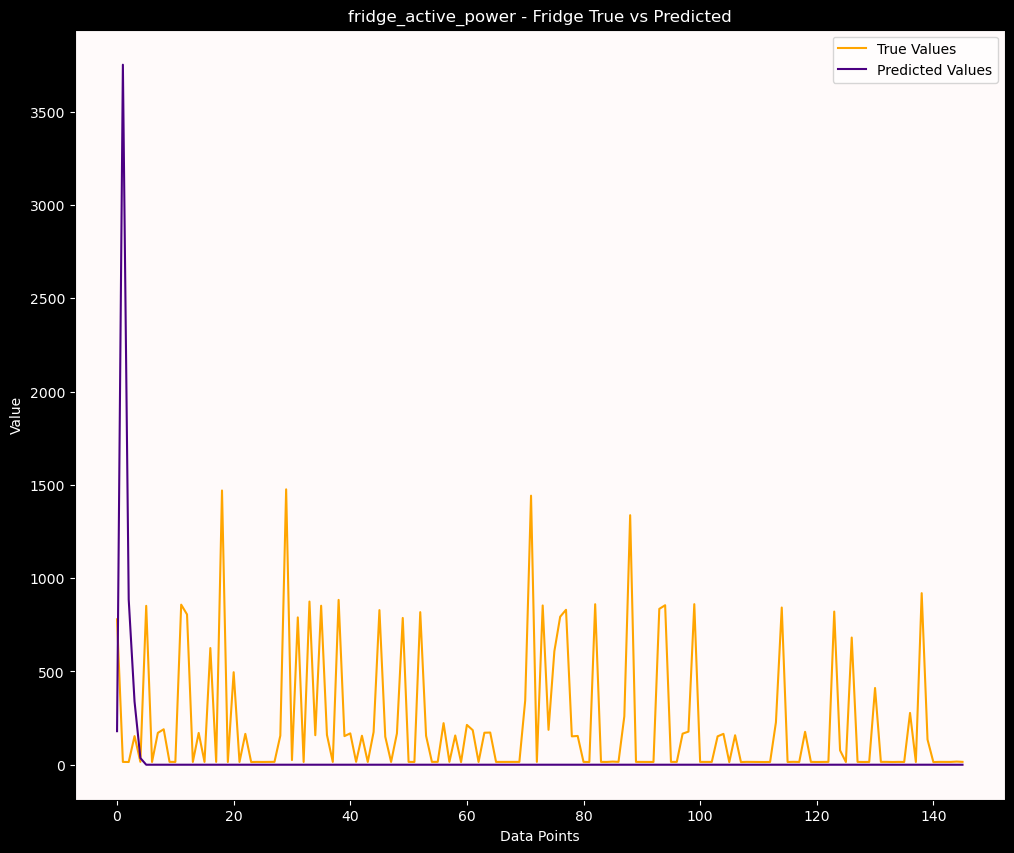

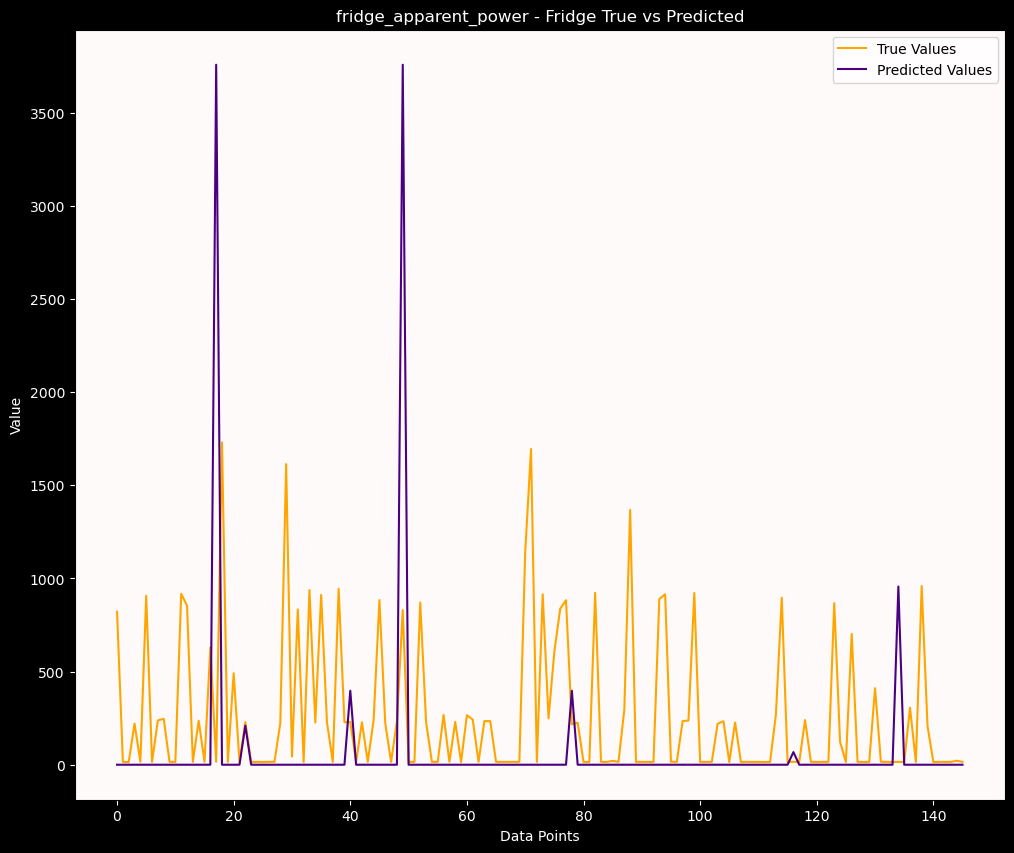

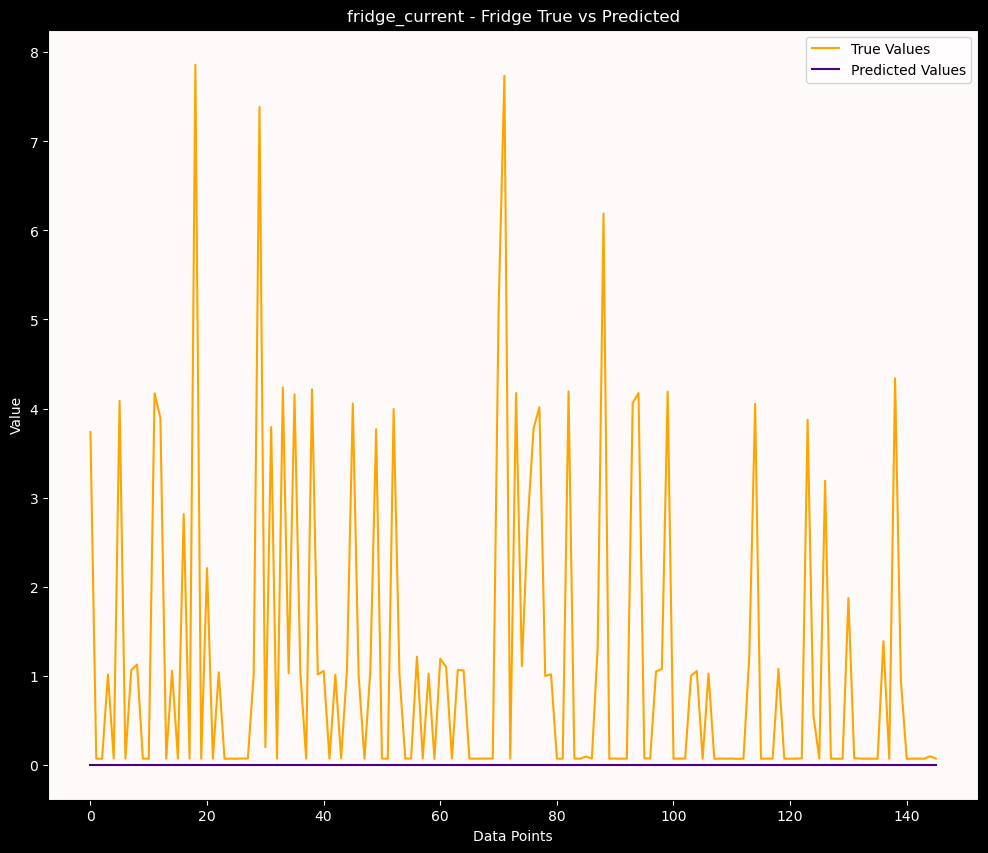

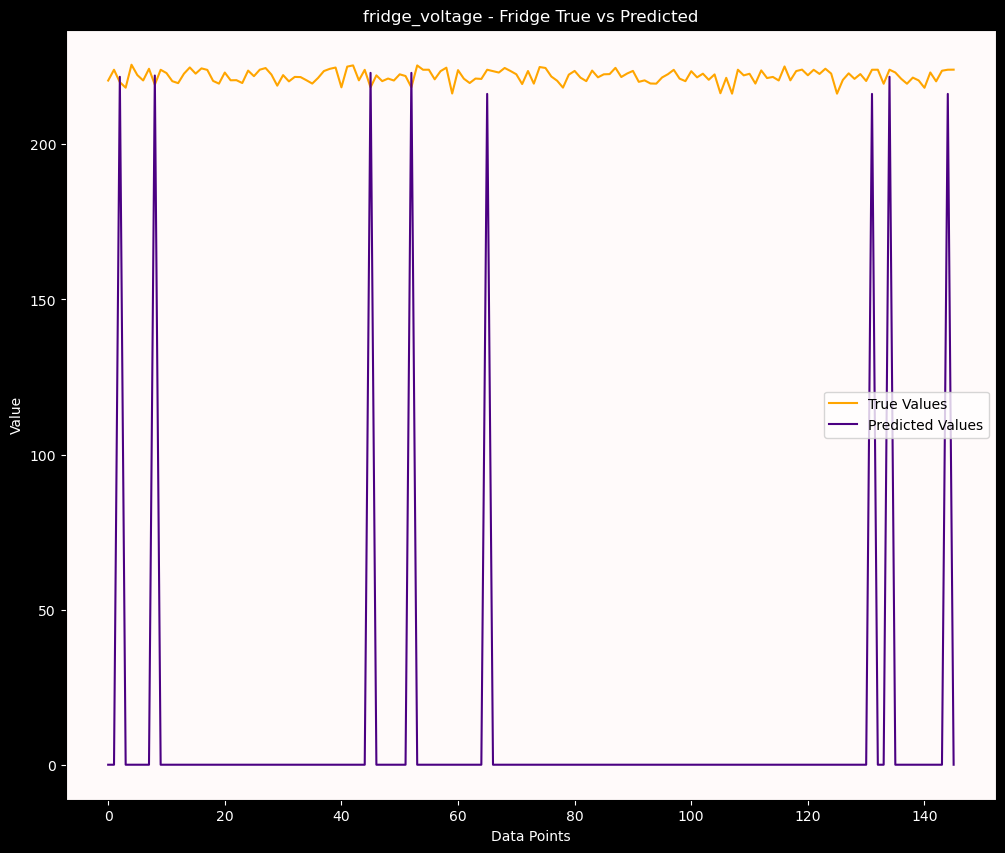

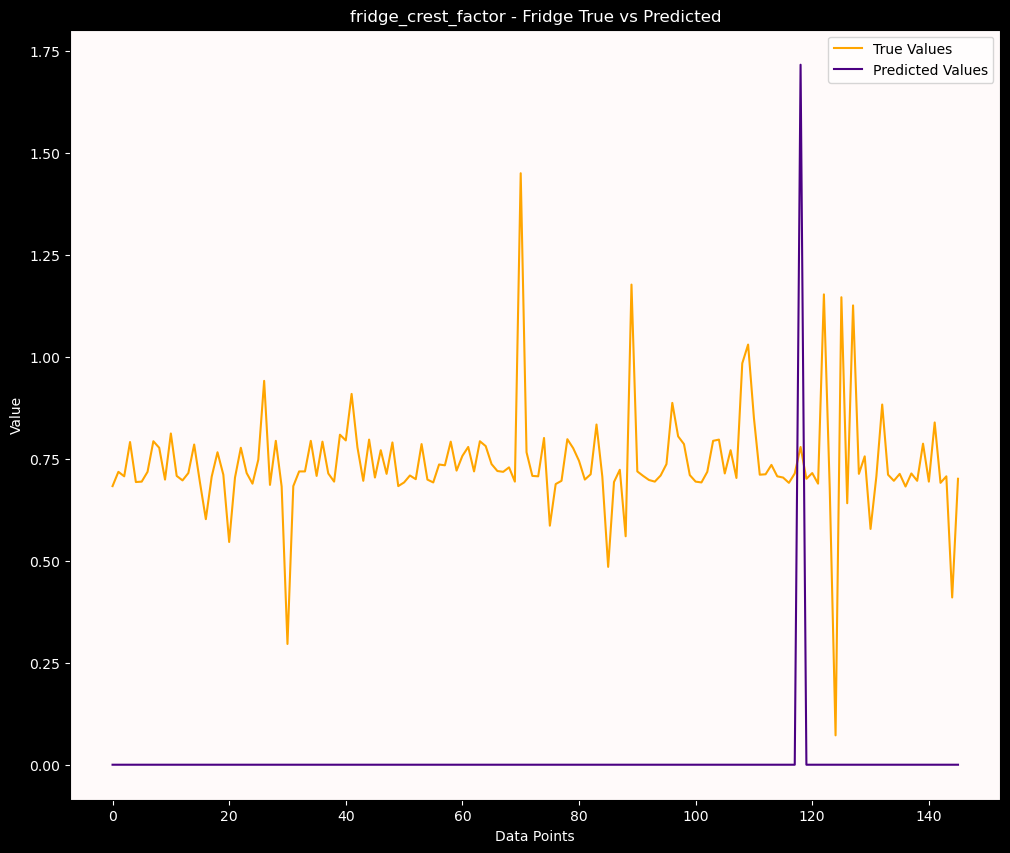

In [3]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_fridge.shape[1]):
    column_name = fridge_features[i]
    column_true = Y_test_fridge[:, i]
    column_pred = disaggregated_data_fridge[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - Fridge True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for washing_machine_active_power:
RMSE: 916.3543953319637
MSE: 839705.3778442087
RMAE: 1.910612802248071
MAE: 485.08412777456857
R2: -0.38955836594332083

Metrics for washing_machine_apparent_power:
RMSE: 927.1005703737476
MSE: 859515.4675873282
RMAE: 1.890737571015833
MAE: 499.031749211977
R2: -0.4296057623082179

Metrics for washing_machine_current:
RMSE: 4.029042284856084
MSE: 16.233181733158332
RMAE: 1.807550389857033
MAE: 2.162577687626775
R2: -0.2988871465926439

Metrics for washing_machine_voltage:
RMSE: 219.29134175856092
MSE: 48088.69257026996
RMAE: 0.9830406634142926
MAE: 215.51581804574386
R2: -3769.3600802900696

Metrics for washing_machine_crest_factor:
RMSE: 0.9130475874626699
MSE: 0.8336558969714019
RMAE: 1.071851649425481
MAE: 0.8766505201785694
R2: -16.492583082580406



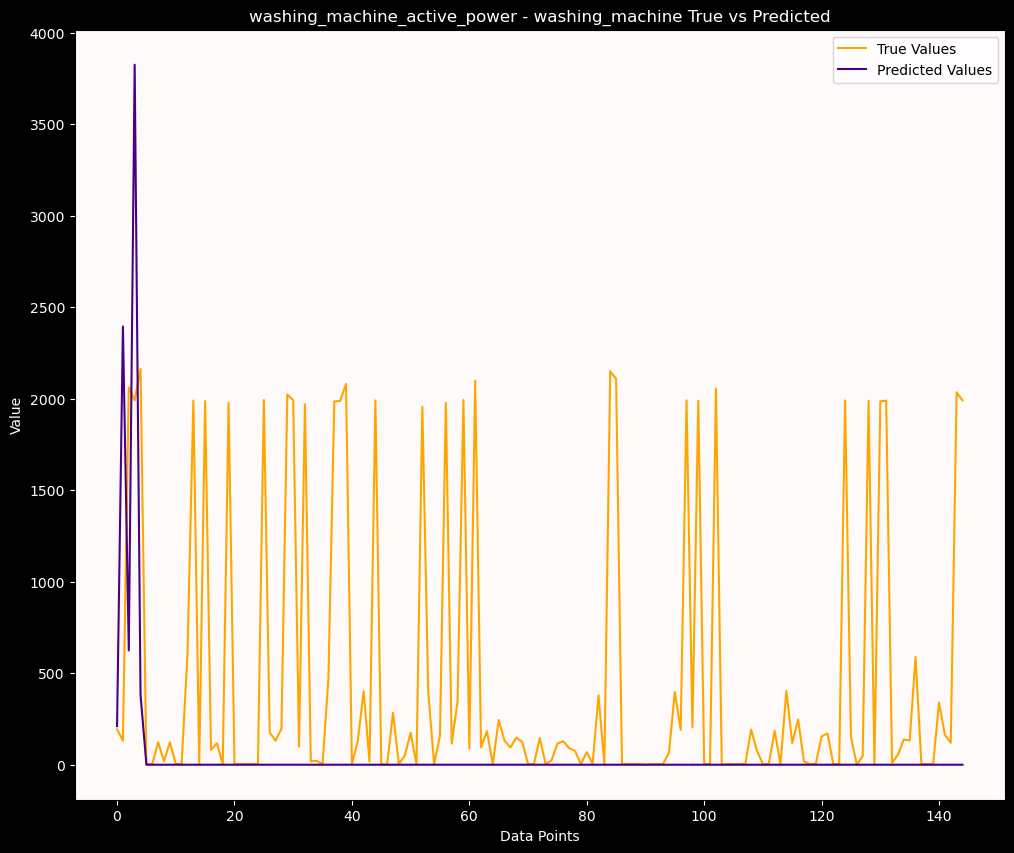

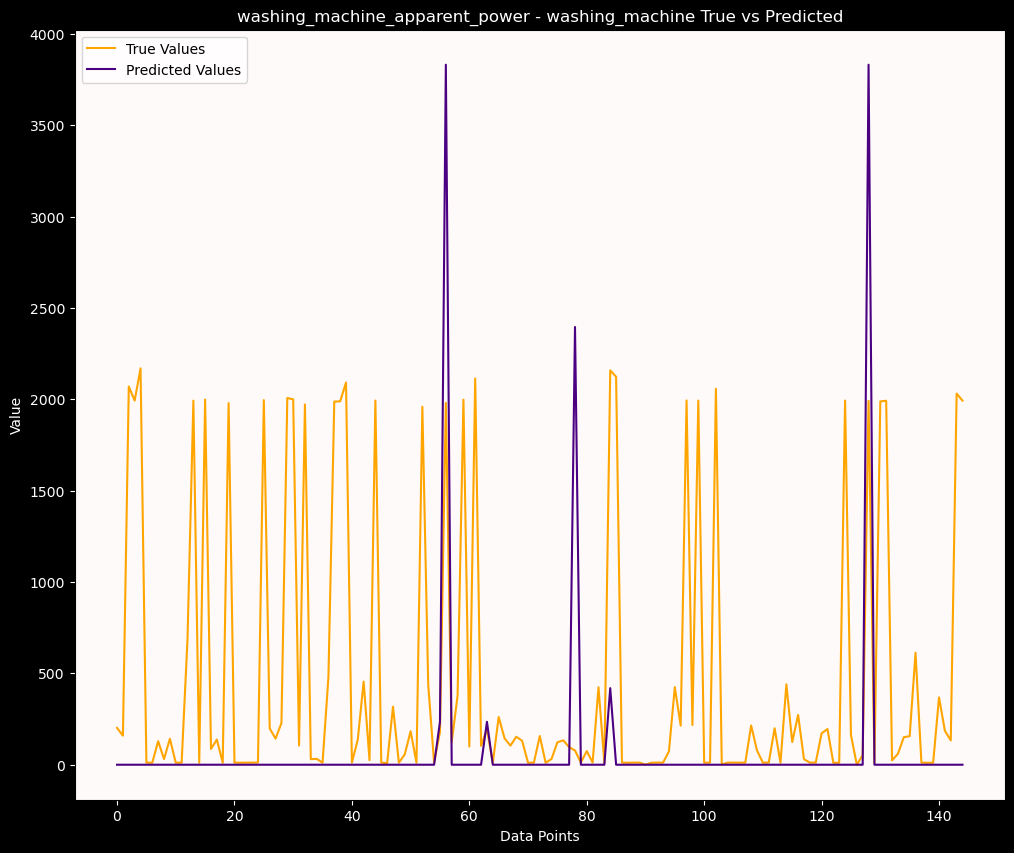

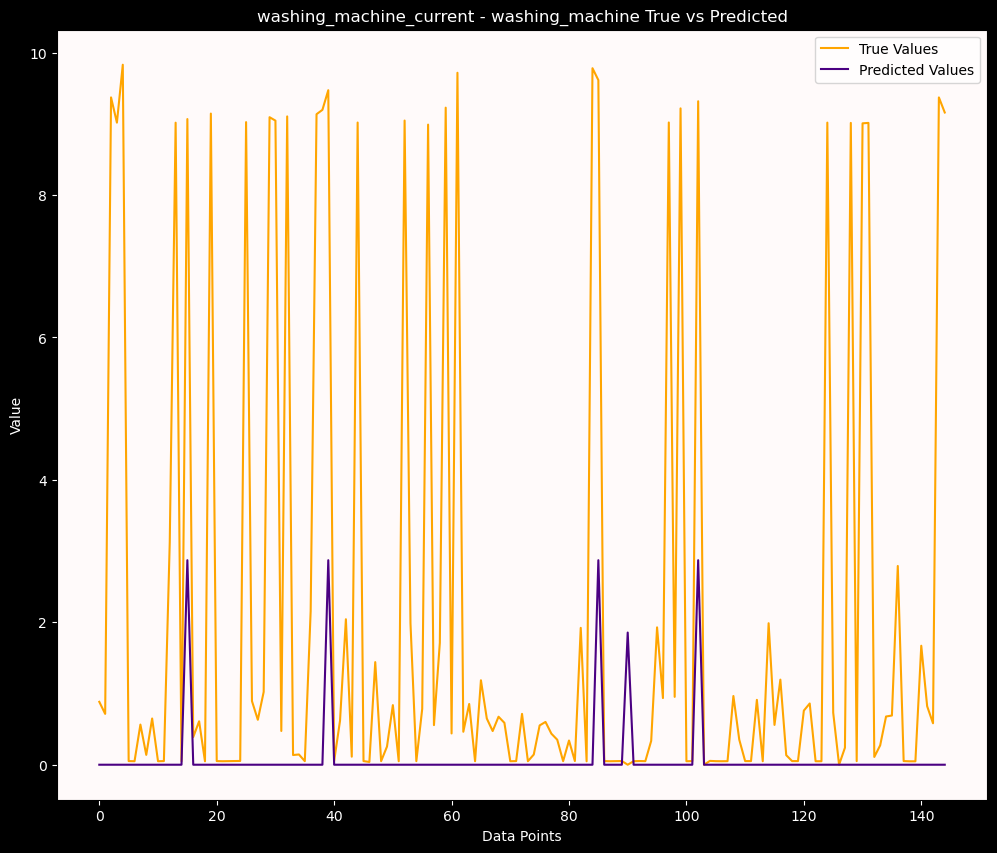

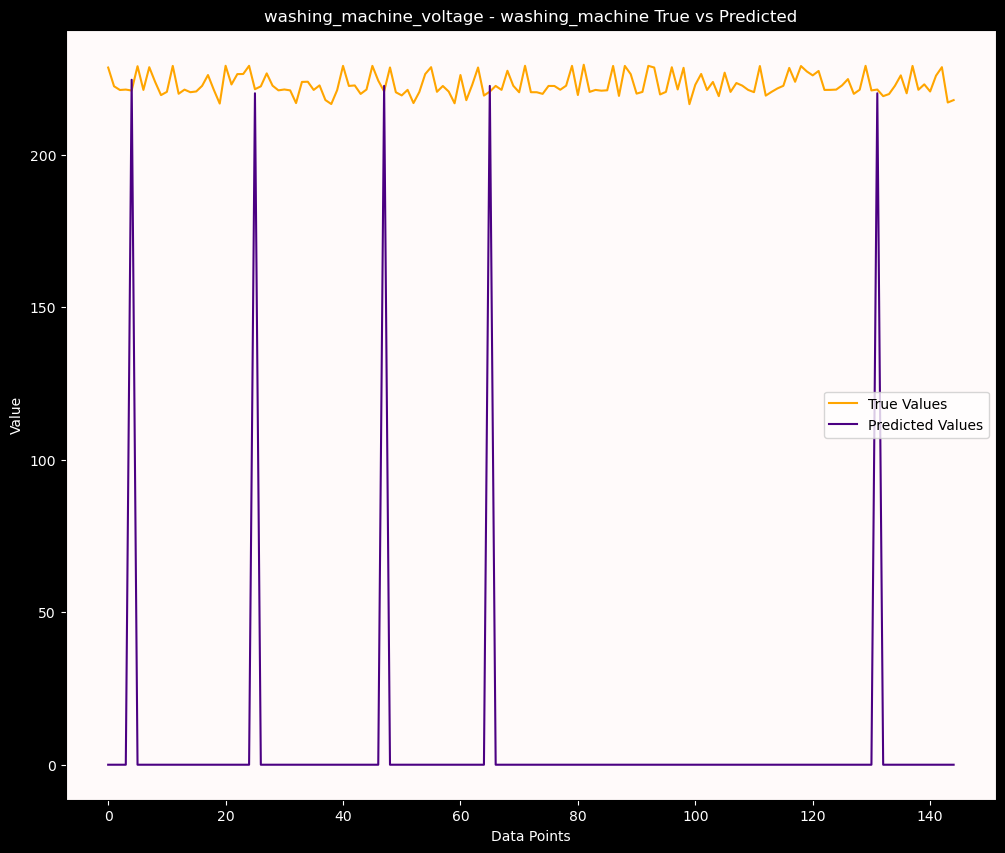

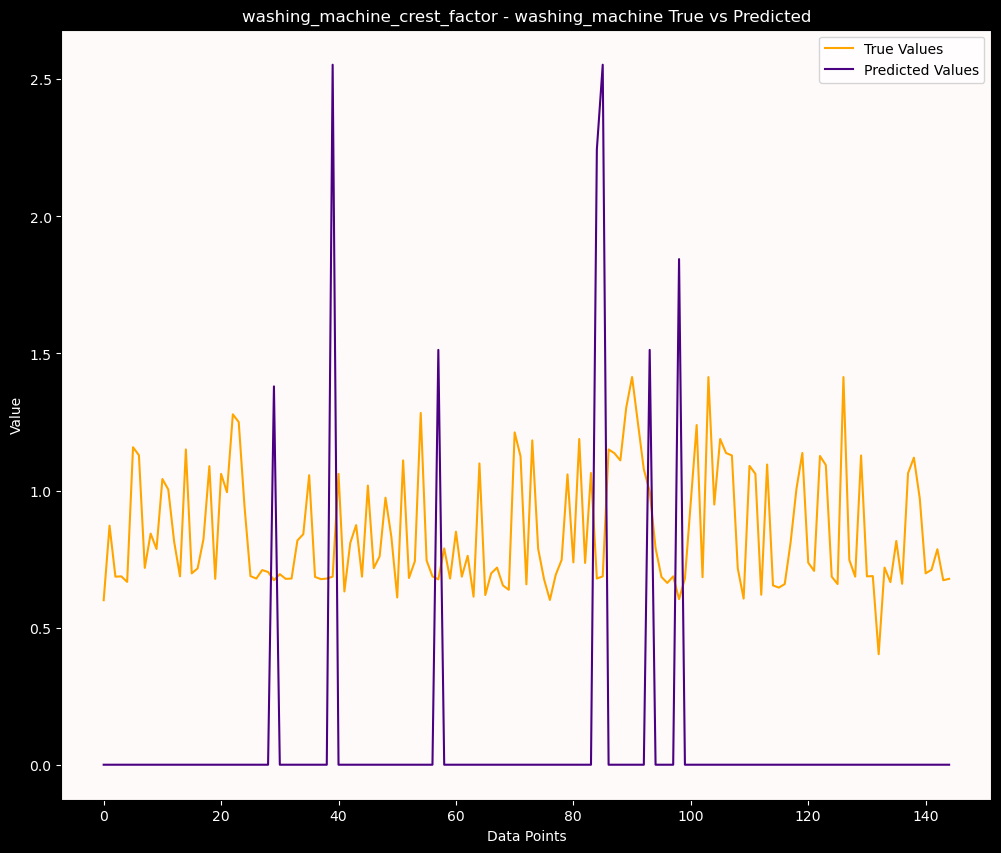

In [4]:
## WASHING MACHINE ##



X_washing_machine = washing_machine_data[aggregated_features].values
Y_washing_machine = washing_machine_data[washing_machine_features].values

X_train_washing_machine, X_test_washing_machine, Y_train_washing_machine, Y_test_washing_machine = train_test_split(X_washing_machine, Y_washing_machine, test_size=0.2, random_state=42)

hart85_disaggregator_washing_machine = Hart85(num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5)
hart85_disaggregator_washing_machine.train(X_train_washing_machine)

disaggregated_data_washing_machine = hart85_disaggregator_washing_machine.disaggregate(X_test_washing_machine)

for i, feature in enumerate(washing_machine_features):
    true_values = Y_test_washing_machine[:, i]
    pred_values = disaggregated_data_washing_machine[:, i]
    
    rmse = hart85_disaggregator_washing_machine.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_washing_machine.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_washing_machine.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_washing_machine.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_washing_machine.shape[1]):
    column_name = washing_machine_features[i]
    column_true = Y_test_washing_machine[:, i]
    column_pred = disaggregated_data_washing_machine[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - washing_machine True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for microwave_active_power:
RMSE: 969.0979895639409
MSE: 939150.9133768722
RMAE: 1.5475341991133218
MAE: 653.7639109617879
R2: -1.019347082203006

Metrics for microwave_apparent_power:
RMSE: 1027.5845382119126
MSE: 1055929.9831721894
RMAE: 1.337493645190879
MAE: 796.5272963637997
R2: -1.6104448510209526

Metrics for microwave_current:
RMSE: 4.688276726917806
MSE: 21.97993866815914
RMAE: 1.340540348827253
MAE: 3.5954740477514555
R2: -1.5692496971740804

Metrics for microwave_voltage:
RMSE: 219.08768006229062
MSE: 47999.411555076615
RMAE: 0.9886698223830584
MAE: 216.674826563786
R2: -5371.7915090492515

Metrics for microwave_crest_factor:
RMSE: 0.8178939690186605
MSE: 0.6689505445570977
RMAE: 1.0604045657906689
MAE: 0.7833833033033032
R2: -11.83599952799409



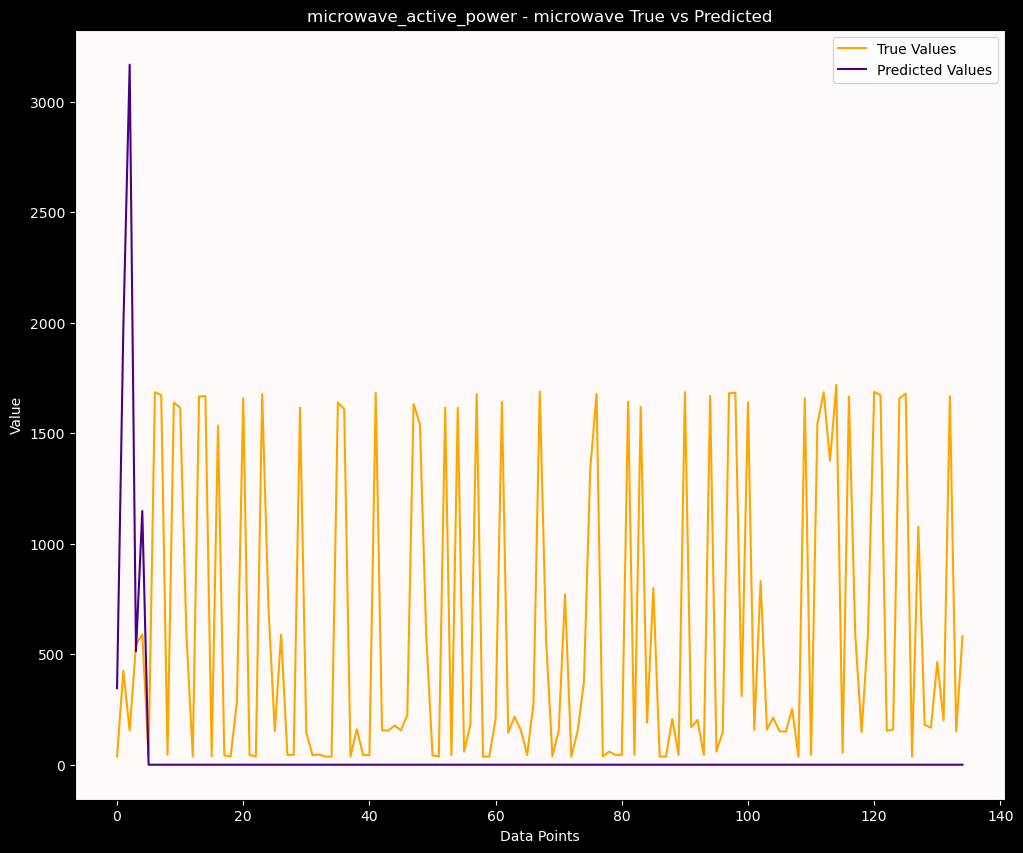

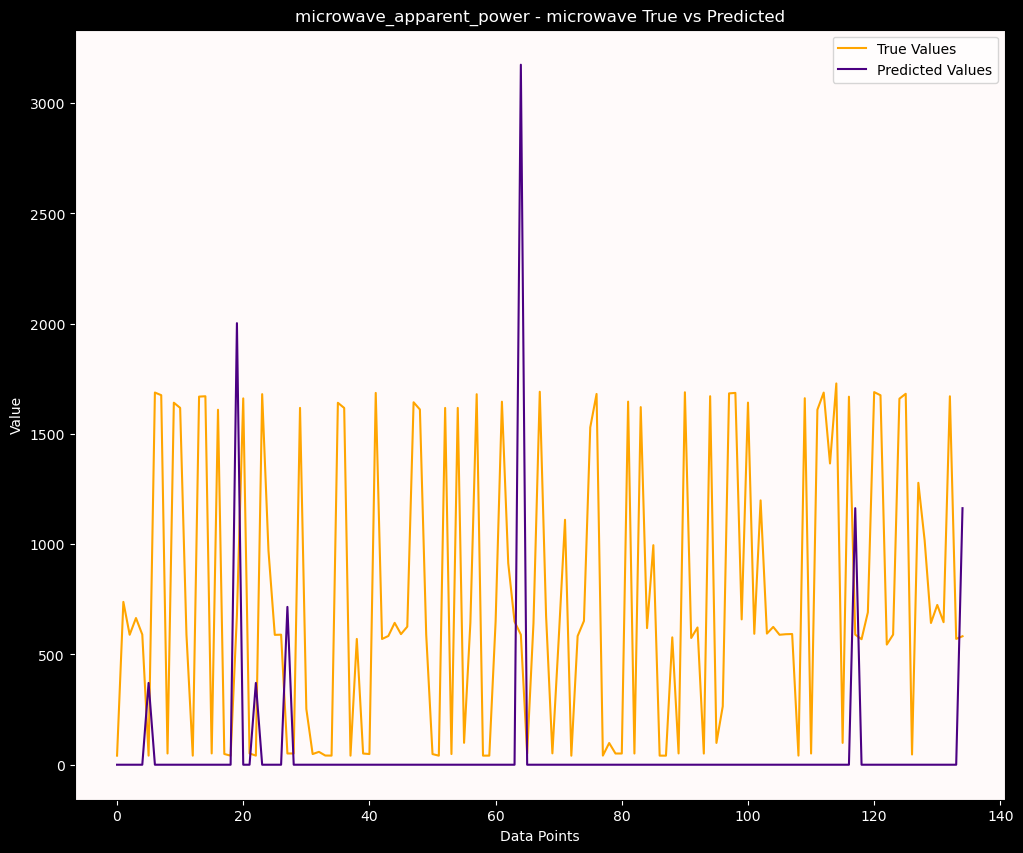

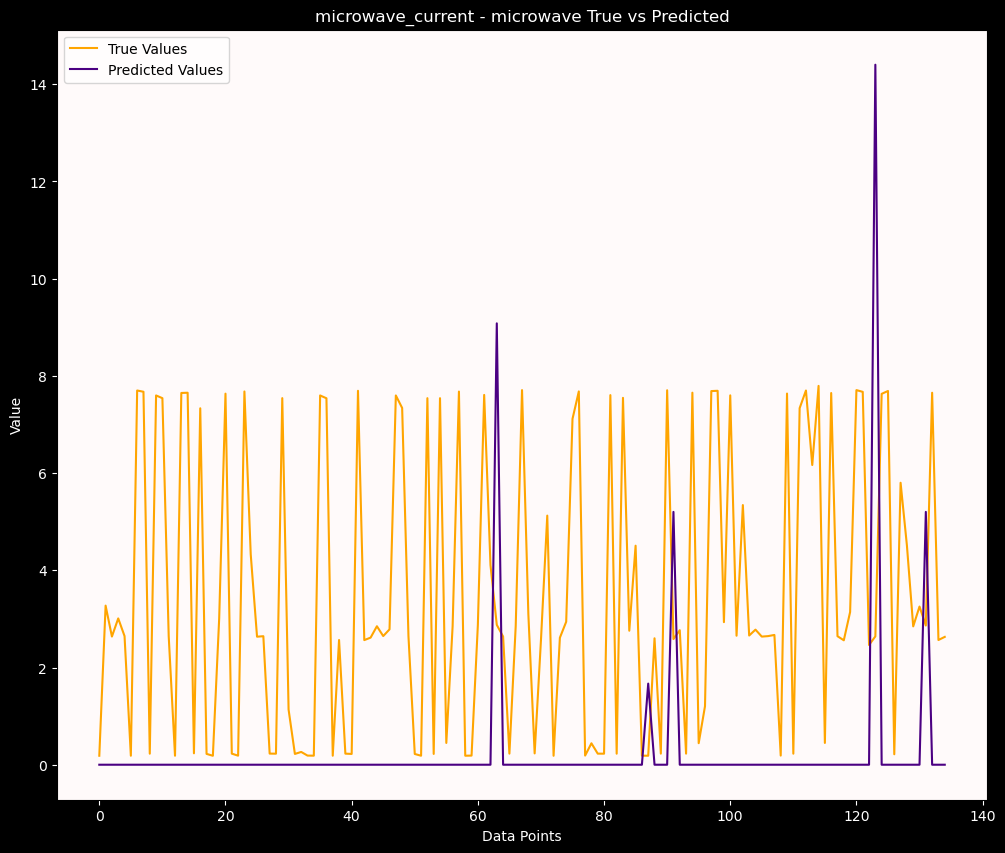

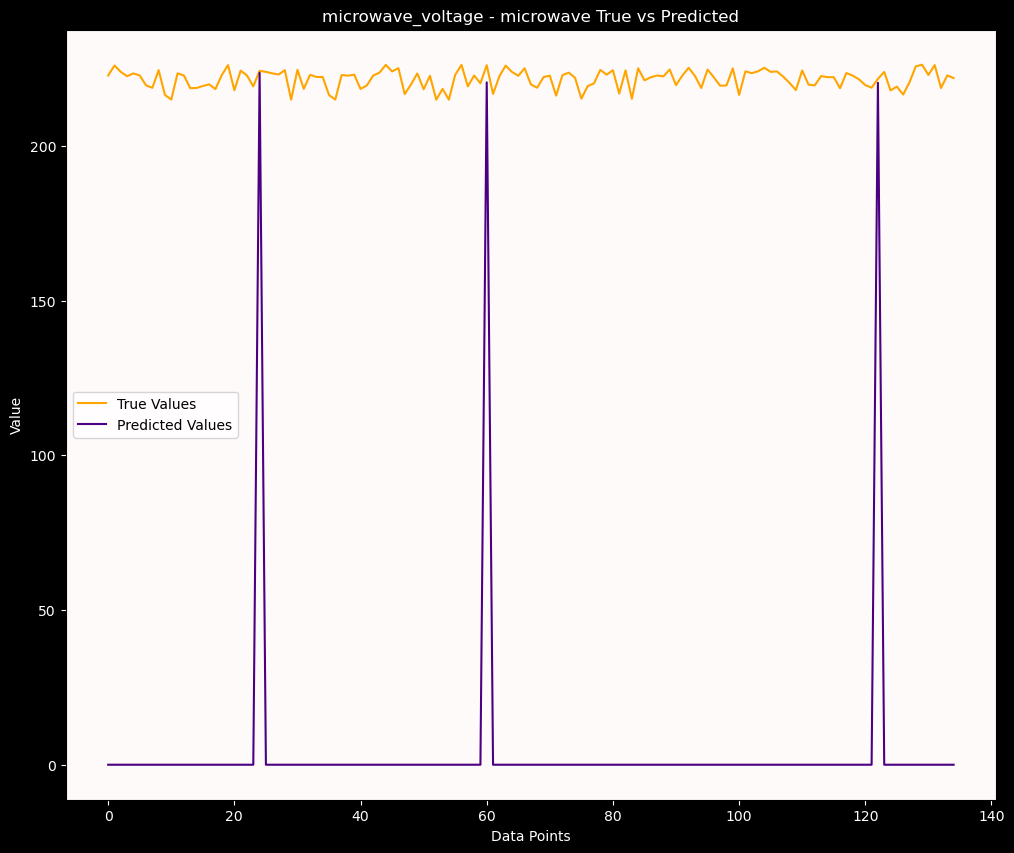

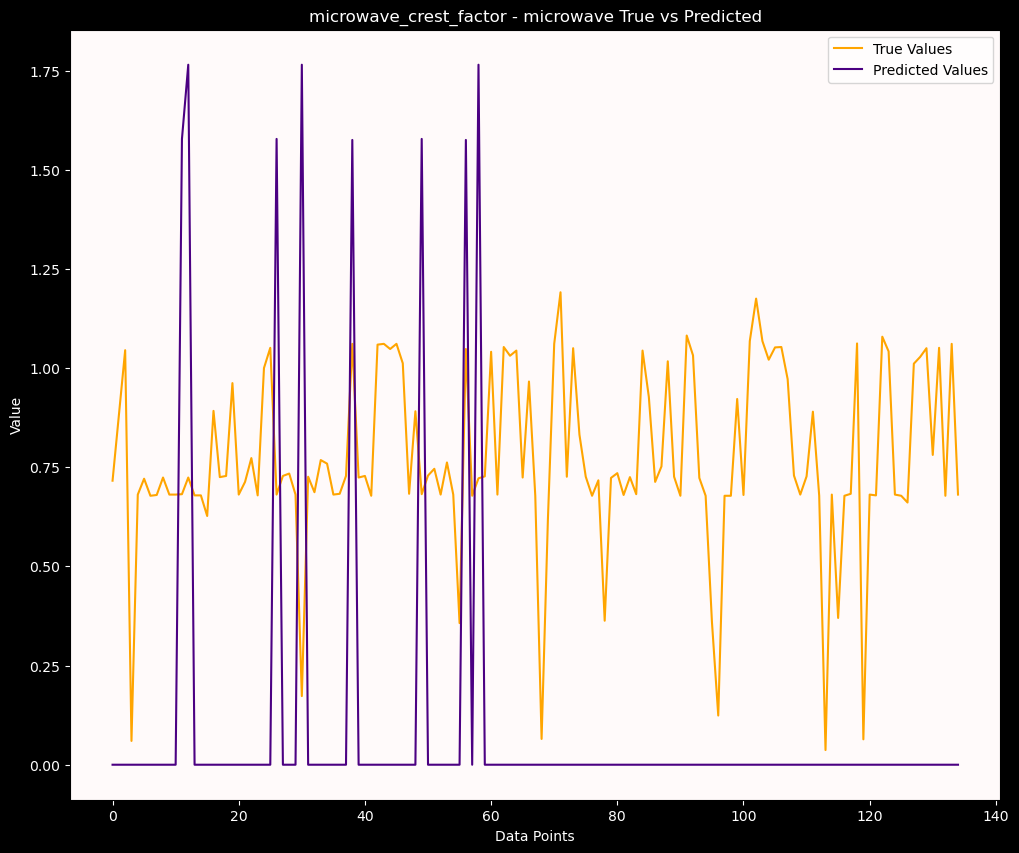

In [5]:
## MICROWAVE ##



X_microwave = microwave_data[aggregated_features].values
Y_microwave = microwave_data[microwave_features].values

X_train_microwave, X_test_microwave, Y_train_microwave, Y_test_microwave = train_test_split(X_microwave, Y_microwave, test_size=0.2, random_state=42)

hart85_disaggregator_microwave = Hart85(num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5)
hart85_disaggregator_microwave.train(X_train_microwave)

disaggregated_data_microwave = hart85_disaggregator_microwave.disaggregate(X_test_microwave)

for i, feature in enumerate(microwave_features):
    true_values = Y_test_microwave[:, i]
    pred_values = disaggregated_data_microwave[:, i]
    
    rmse = hart85_disaggregator_microwave.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_microwave.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_microwave.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_microwave.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_microwave.shape[1]):
    column_name = microwave_features[i]
    column_true = Y_test_microwave[:, i]
    column_pred = disaggregated_data_microwave[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - microwave True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()



Metrics for dishwasher_active_power:
RMSE: 639.7710436184702
MSE: 409306.98825266655
RMAE: 64.47138498002722
MAE: 485.82
R2: -2080.4223951516924

Metrics for dishwasher_apparent_power:
RMSE: 1003.7102845229626
MSE: 1007434.3352571665
RMAE: 33.73740480402554
MAE: 821.3649999999999
R2: -914.4551073242044

Metrics for dishwasher_current:
RMSE: 0.20336338575728585
MSE: 0.04135666666666666
RMAE: 1.5026851164331467
MAE: 0.13533333333333333
R2: -0.7948730313346897

Metrics for dishwasher_voltage:
RMSE: 222.91233029003428
MSE: 49689.90699533333
RMAE: 1.0000792465052295
MAE: 222.89466666666667
R2: -6309.176508303781

Metrics for dishwasher_crest_factor:
RMSE: 1.9746448625850002
MSE: 3.899222333333334
RMAE: 1.0980416288702504
MAE: 1.7983333333333331
R2: -4.86155698636507



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


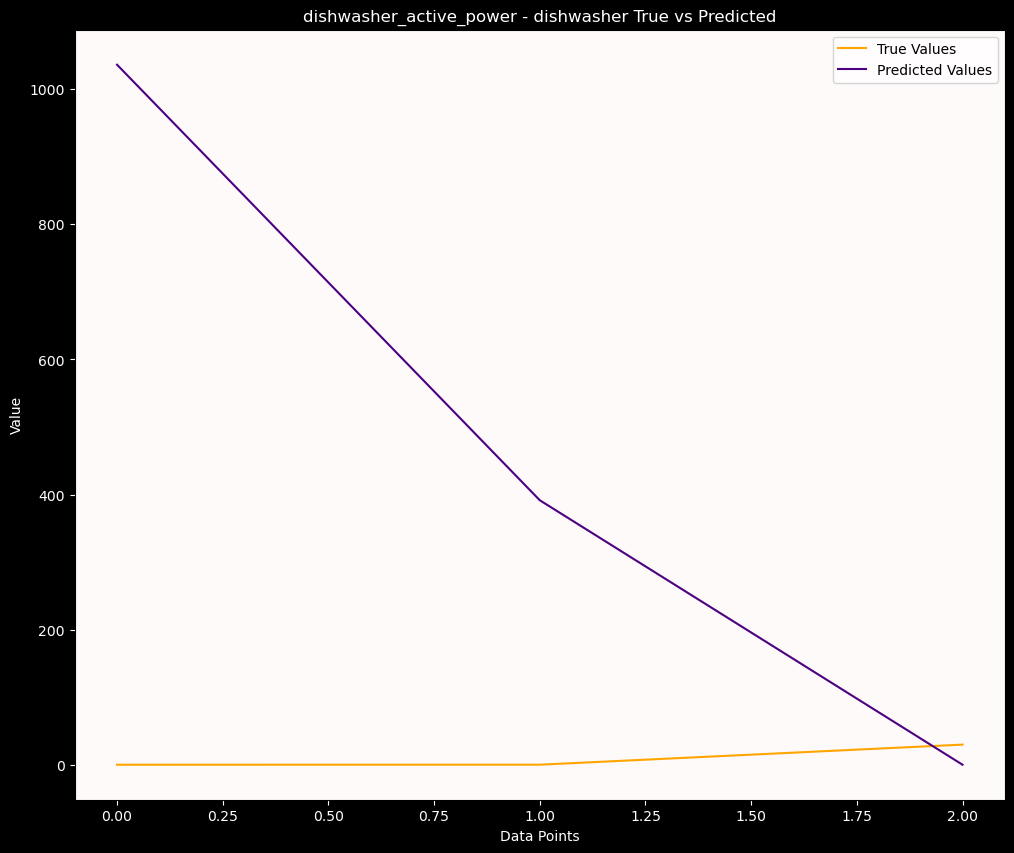

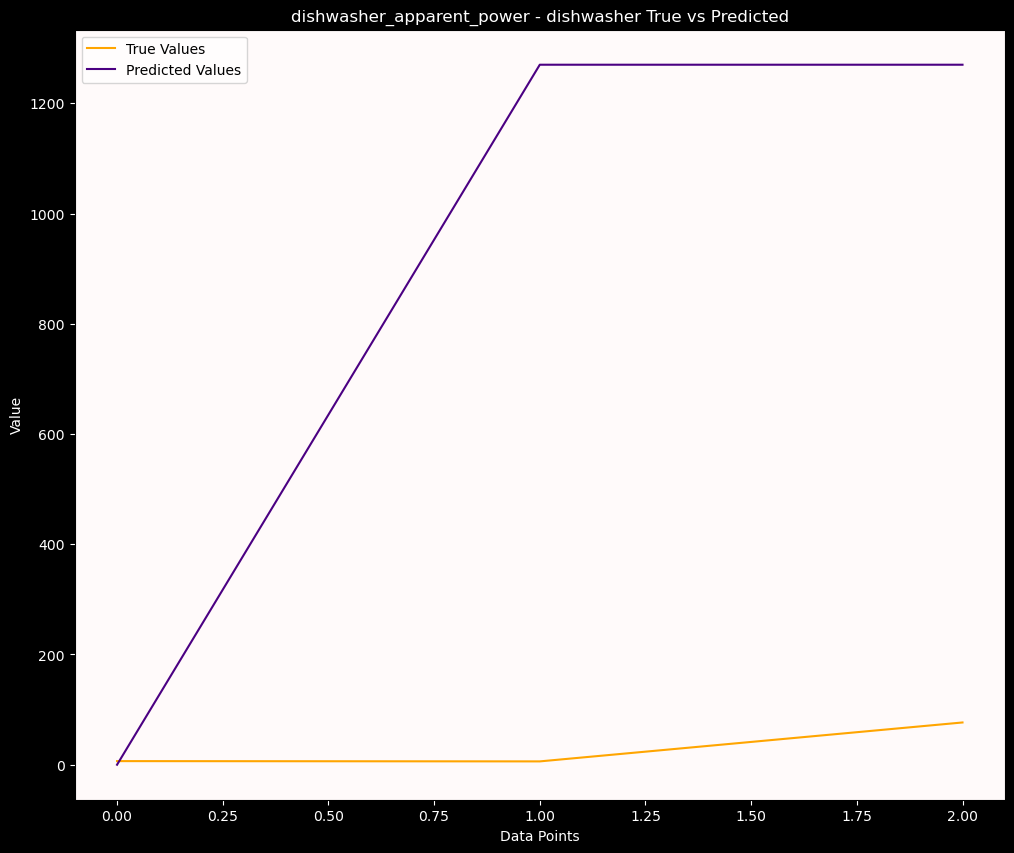

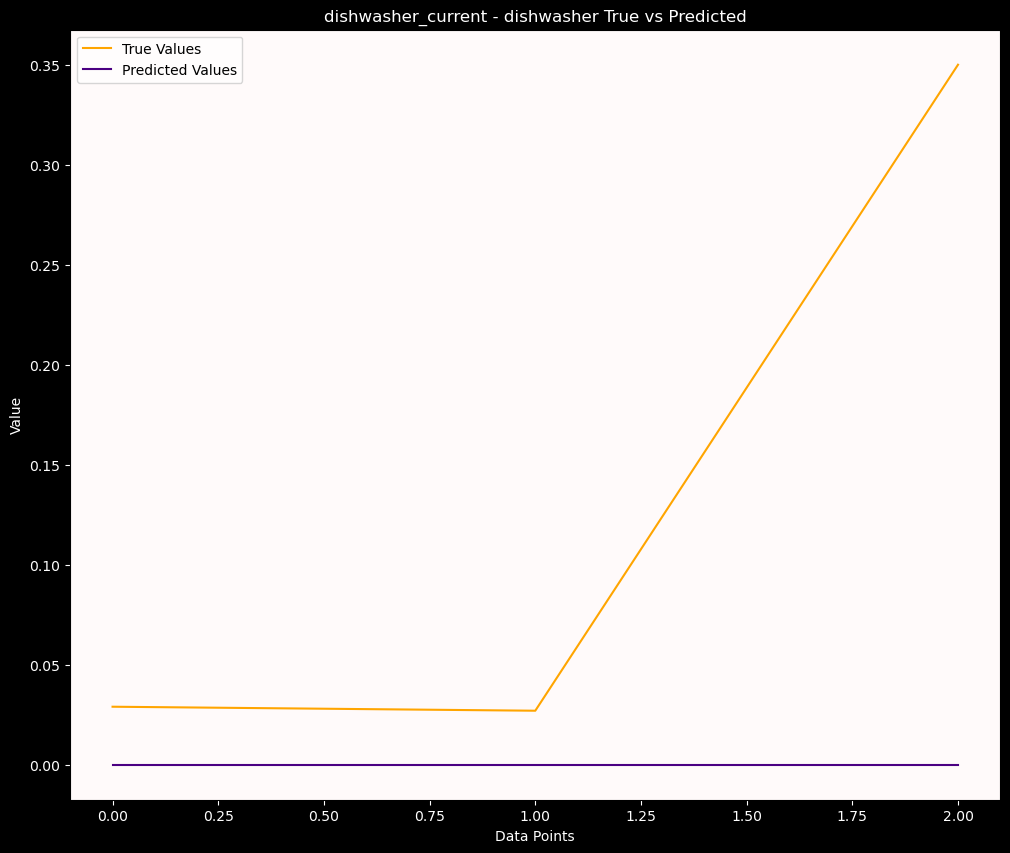

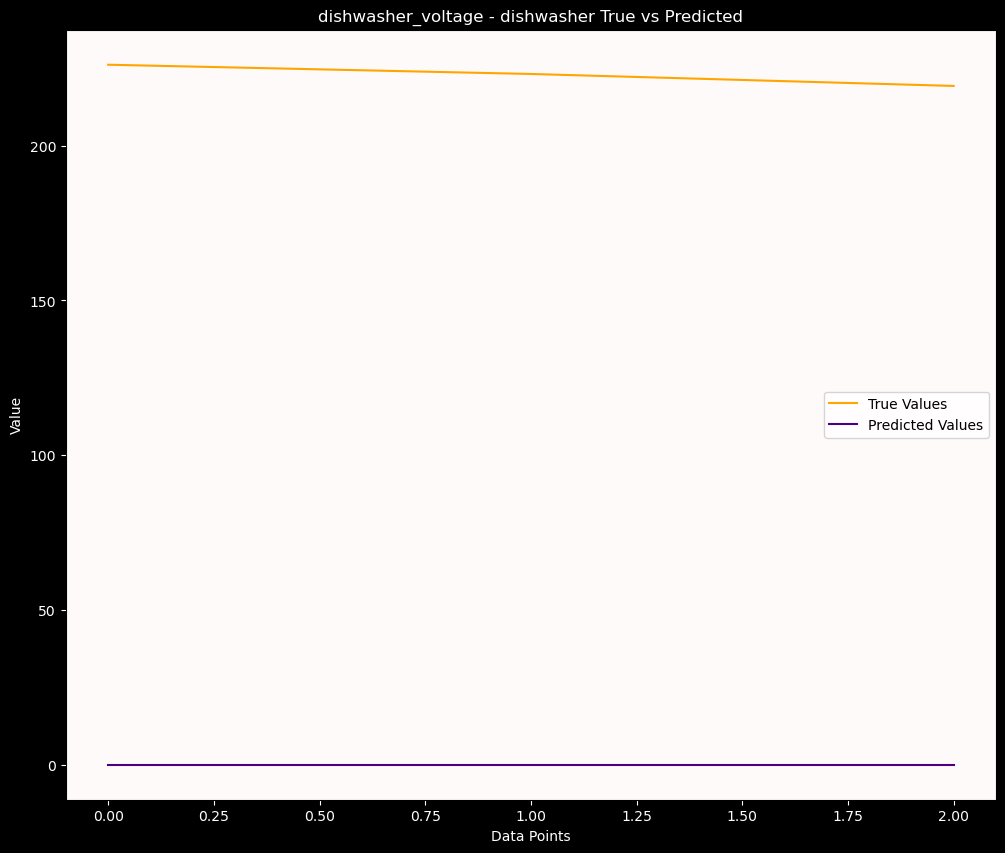

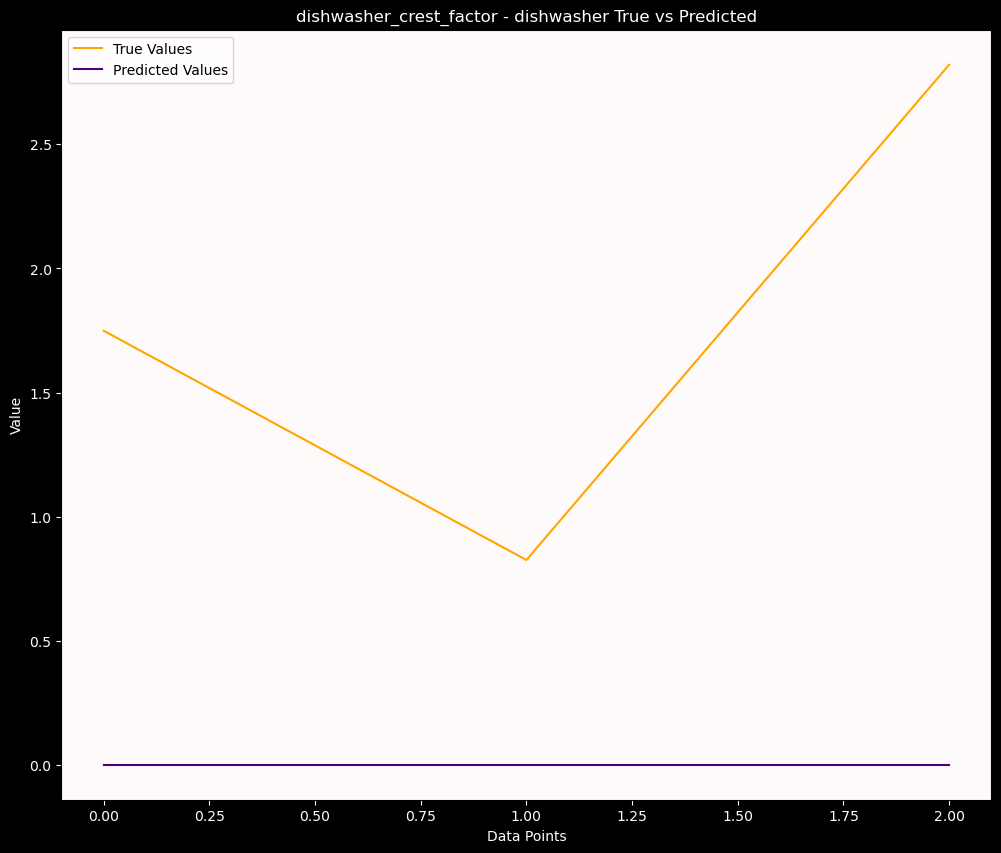

In [11]:
## DISHWASHER ##



X_dishwasher = dishwasher_data[aggregated_features].values
Y_dishwasher = dishwasher_data[dishwasher_features].values

X_train_dishwasher, X_test_dishwasher, Y_train_dishwasher, Y_test_dishwasher = train_test_split(X_dishwasher, Y_dishwasher, test_size=0.2, random_state=42)

hart85_disaggregator_dishwasher = Hart85(num_states=5, num_cluster_init=5, num_cycles_init=2, num_cluster=2)
hart85_disaggregator_dishwasher.train(X_train_dishwasher)

disaggregated_data_dishwasher = hart85_disaggregator_dishwasher.disaggregate(X_test_dishwasher)

for i, feature in enumerate(dishwasher_features):
    true_values = Y_test_dishwasher[:, i]
    pred_values = disaggregated_data_dishwasher[:, i]
    
    rmse = hart85_disaggregator_dishwasher.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_dishwasher.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_dishwasher.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_dishwasher.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_dishwasher.shape[1]):
    column_name = dishwasher_features[i]
    column_true = Y_test_dishwasher[:, i]
    column_pred = disaggregated_data_dishwasher[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - dishwasher True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()



Metrics for hotplate_active_power:
RMSE: 491.95197217633216
MSE: 242016.7429281827
RMAE: 10.722089271771173
MAE: 204.91861166666666
R2: -7.3844781952927345

Metrics for hotplate_apparent_power:
RMSE: 419.6733694182941
MSE: 176125.73699890397
RMAE: 8.059799738972174
MAE: 202.28132
R2: -4.83627971301226

Metrics for hotplate_current:
RMSE: 1.6112637897004947
MSE: 2.5961709999999996
RMAE: 6.838980431665937
MAE: 0.9197999999999998
R2: -3.185538774592369

Metrics for hotplate_voltage:
RMSE: 158.32298217640263
MSE: 25066.166685229506
RMAE: 0.7052547086687528
MAE: 112.471515
R2: -8386.066425612718

Metrics for hotplate_crest_factor:
RMSE: 1.3797281978708704
MSE: 1.9036499
RMAE: 1.0595363215104208
MAE: 1.2701000000000002
R2: -5.967735647027484



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


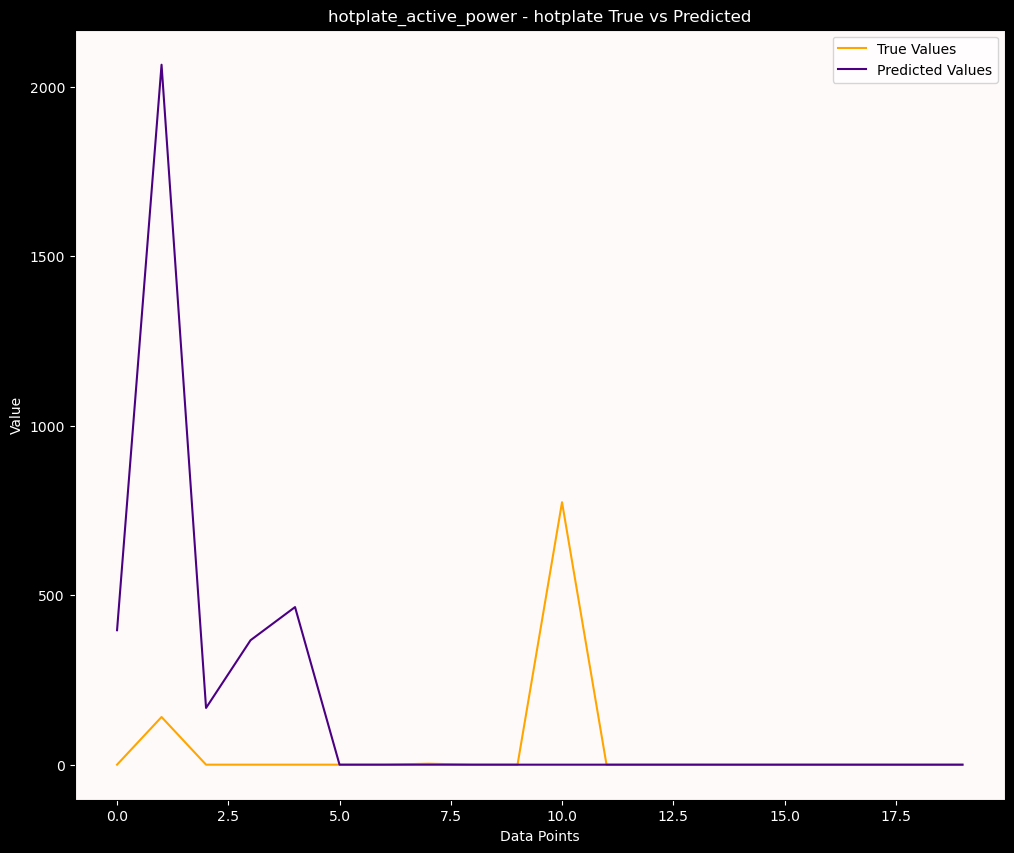

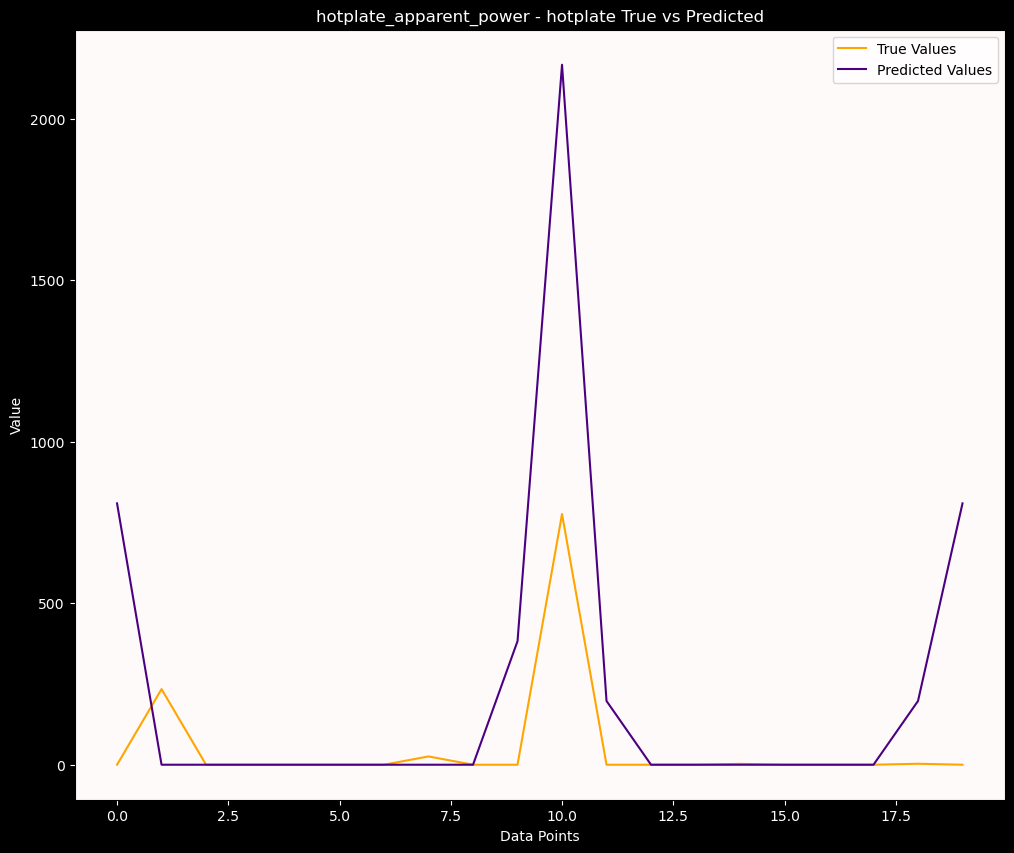

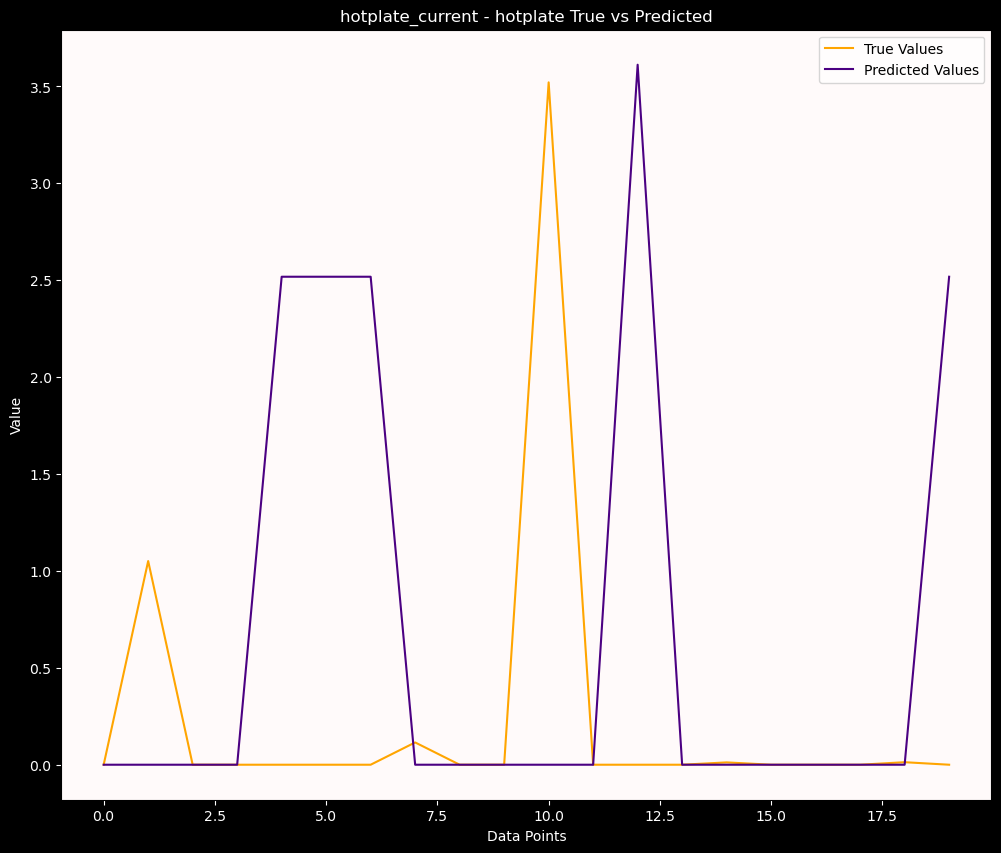

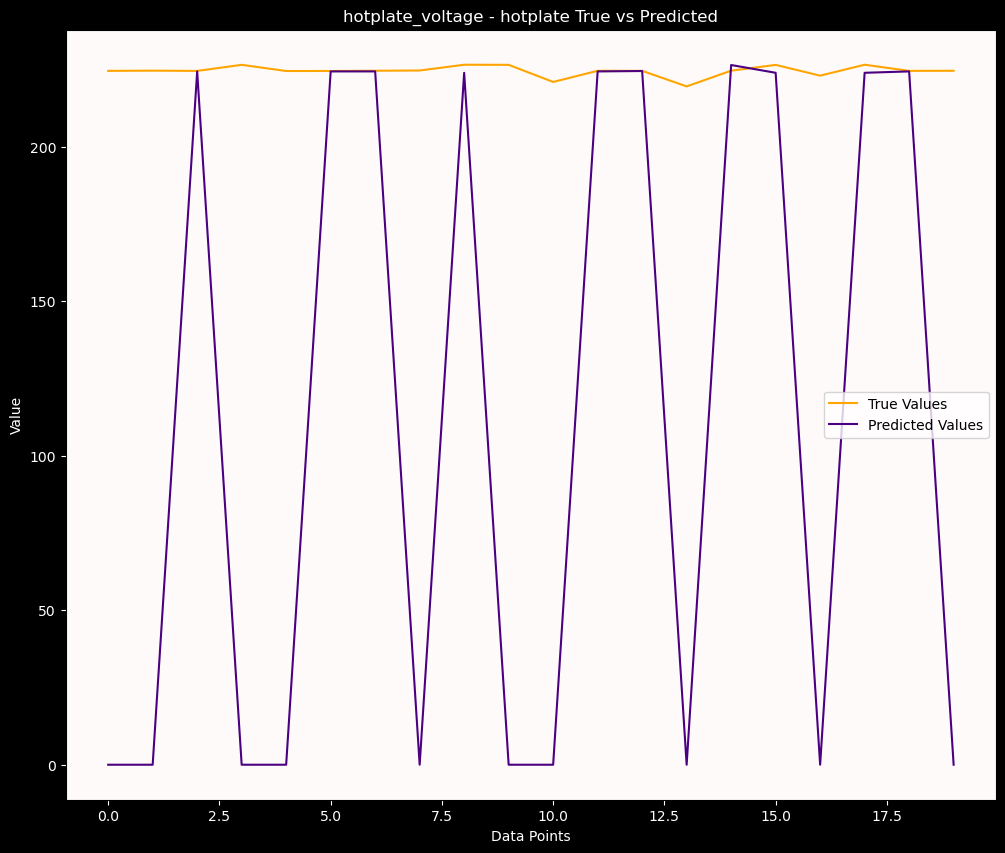

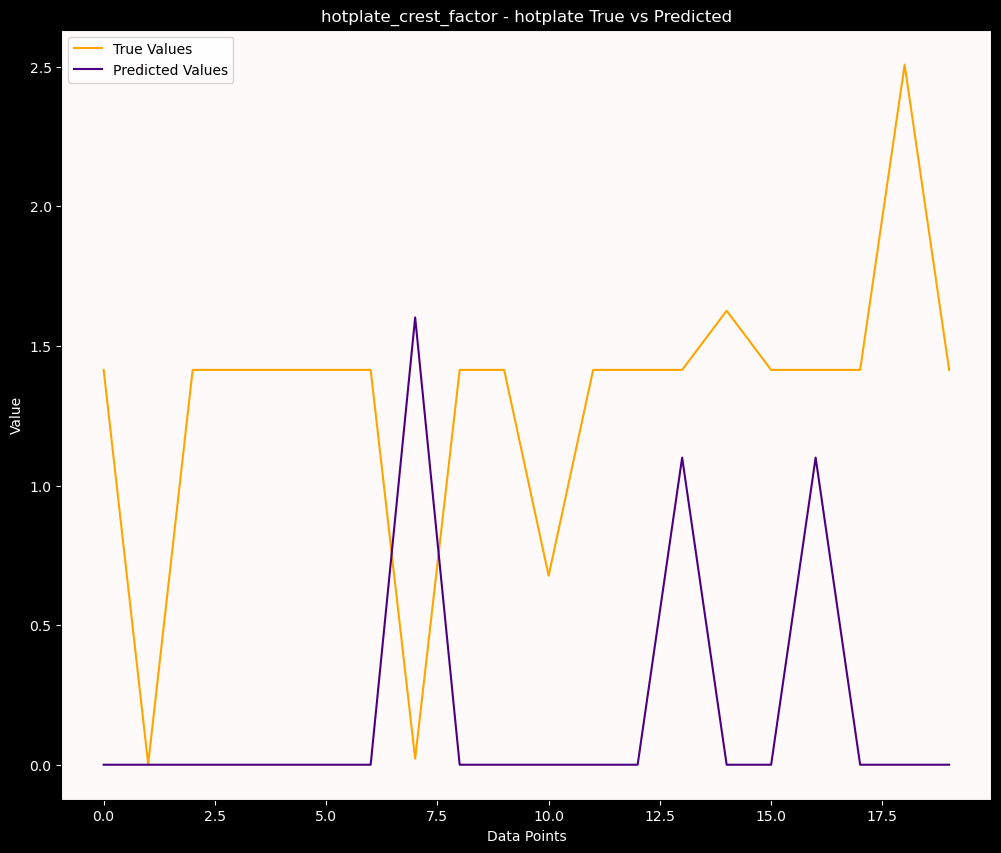

In [12]:
## Hotplate ##



X_hotplate = hotplate_data[aggregated_features].values
Y_hotplate = hotplate_data[hotplate_features].values

X_train_hotplate, X_test_hotplate, Y_train_hotplate, Y_test_hotplate = train_test_split(X_hotplate, Y_hotplate, test_size=0.2, random_state=42)

hart85_disaggregator_hotplate = Hart85(num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5)
hart85_disaggregator_hotplate.train(X_train_hotplate)

disaggregated_data_hotplate = hart85_disaggregator_hotplate.disaggregate(X_test_hotplate)

for i, feature in enumerate(hotplate_features):
    true_values = Y_test_hotplate[:, i]
    pred_values = disaggregated_data_hotplate[:, i]
    
    rmse = hart85_disaggregator_hotplate.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_hotplate.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_hotplate.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_hotplate.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_hotplate.shape[1]):
    column_name = hotplate_features[i]
    column_true = Y_test_hotplate[:, i]
    column_pred = disaggregated_data_hotplate[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - hotplate True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()



/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Metrics for water_heater_active_power:
RMSE: 536.7779971833571
MSE: 288130.61826017615
RMAE: 6.638982245139888
MAE: 81.2107056479932
R2: -0.023968419331560353

Metrics for water_heater_apparent_power:
RMSE: 537.9567080956953
MSE: 289397.4197851571
RMAE: 6.0171966773365755
MAE: 89.53176078089403
R2: -0.02986728506268288

Metrics for water_heater_current:
RMSE: 2.4509010617752764
MSE: 6.006916014611178
RMAE: 6.023425061410277
MAE: 0.40750439980342035
R2: -0.029808634006995405

Metrics for water_heater_voltage:
RMSE: 222.5847572315501
MSE: 49543.9741518281
RMAE: 1.0000444914720603
MAE: 222.56846379950704
R2: -8444.579481017072

Metrics for water_heater_crest_factor:
RMSE: 2.411129239505555
MSE: 5.813544209598636
RMAE: 1.02522588892119
MAE: 2.3517603190697414
R2: -19.564928405751406



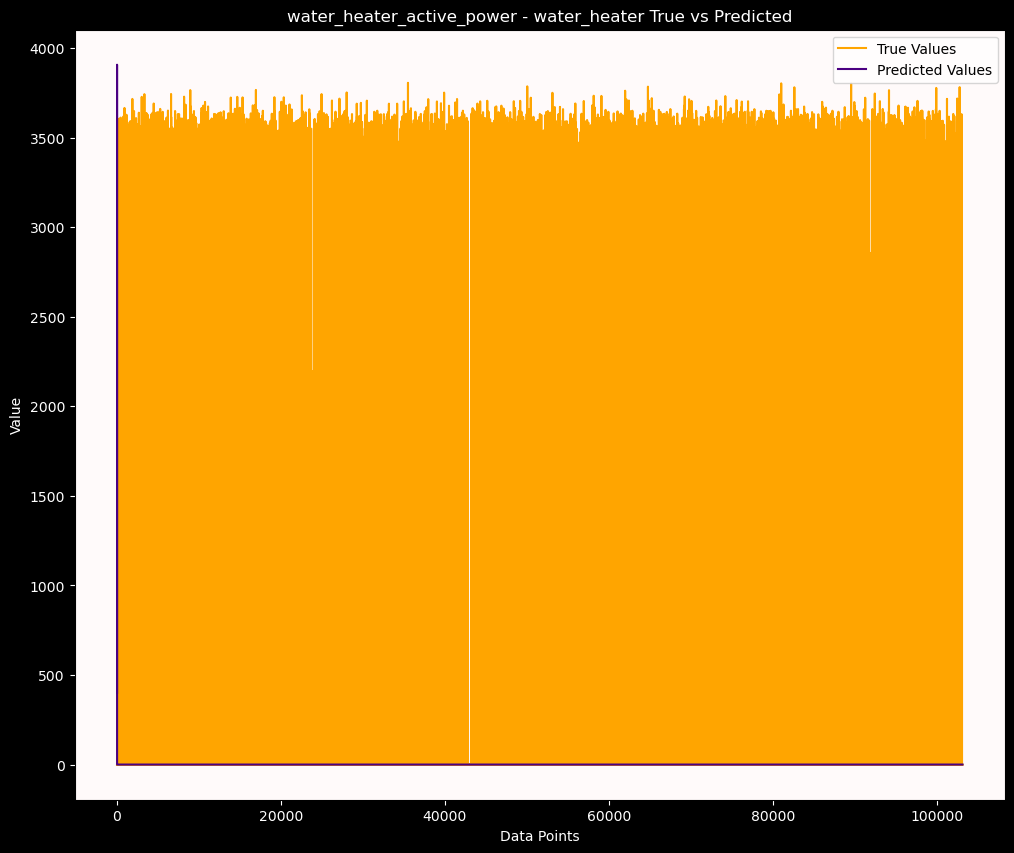

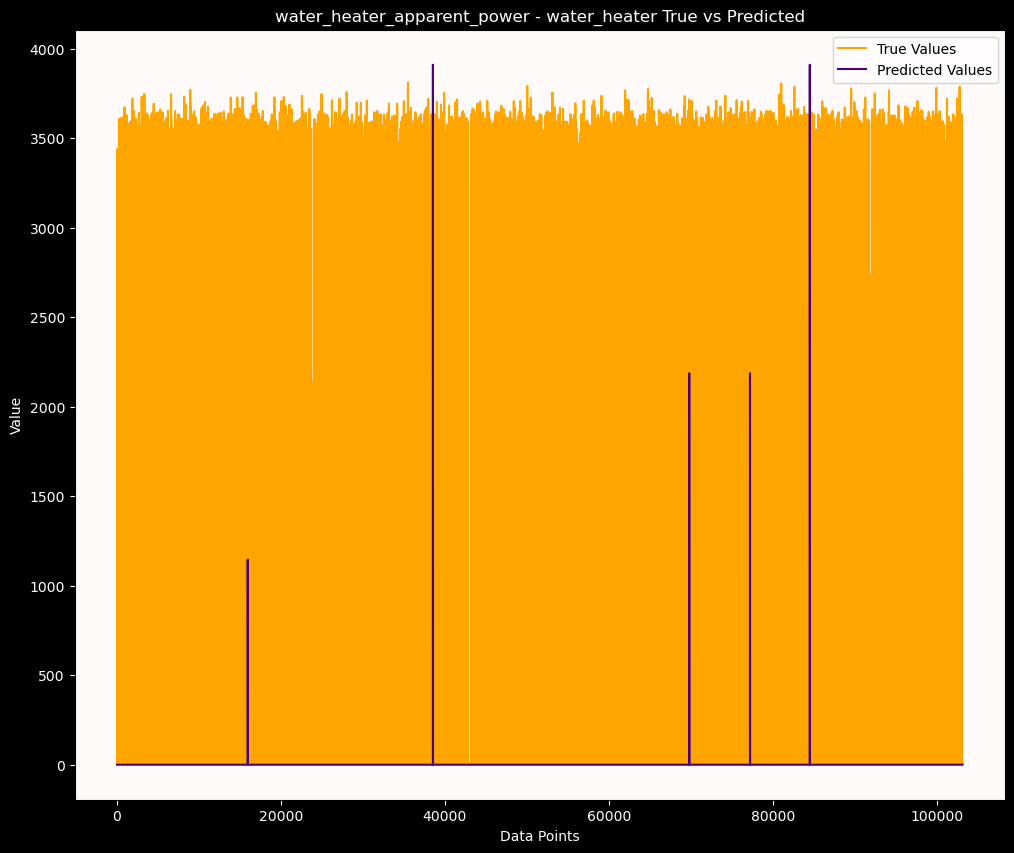

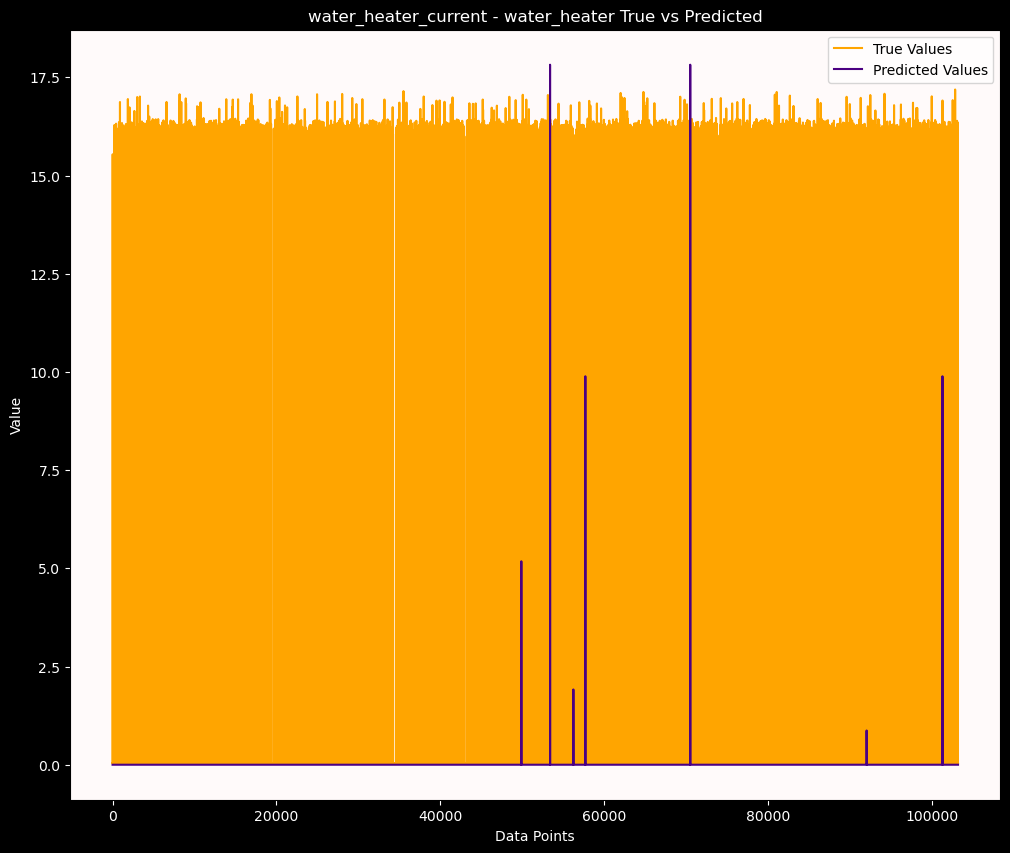

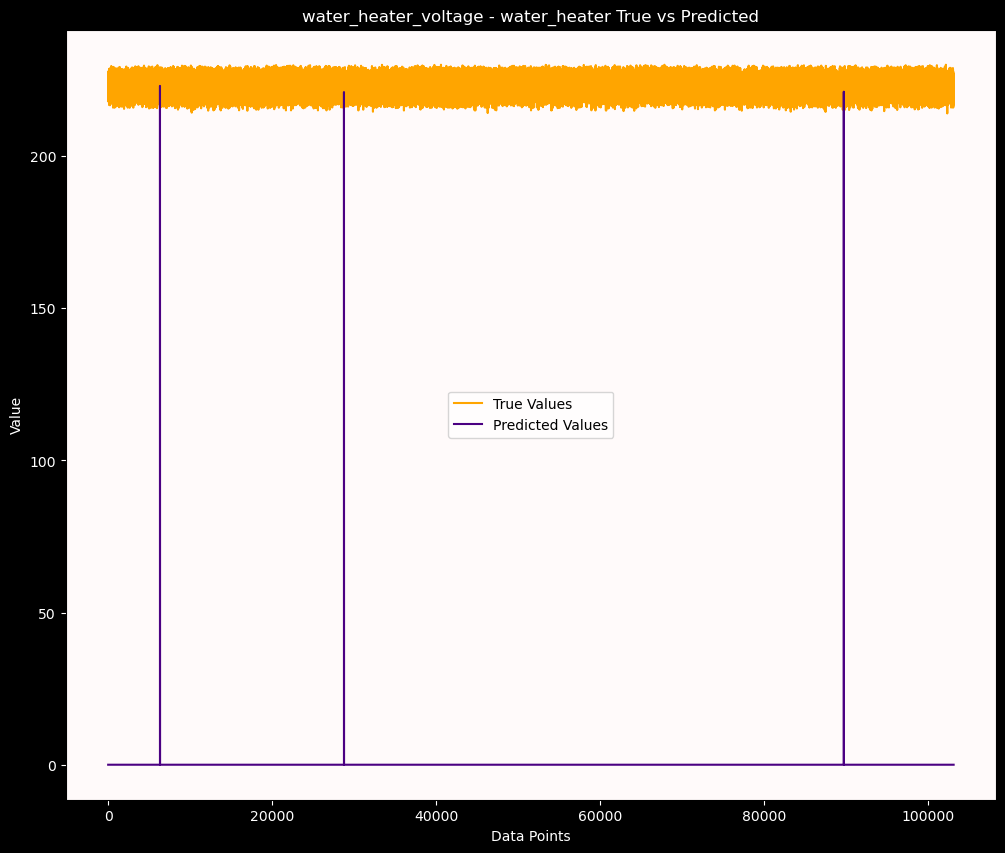

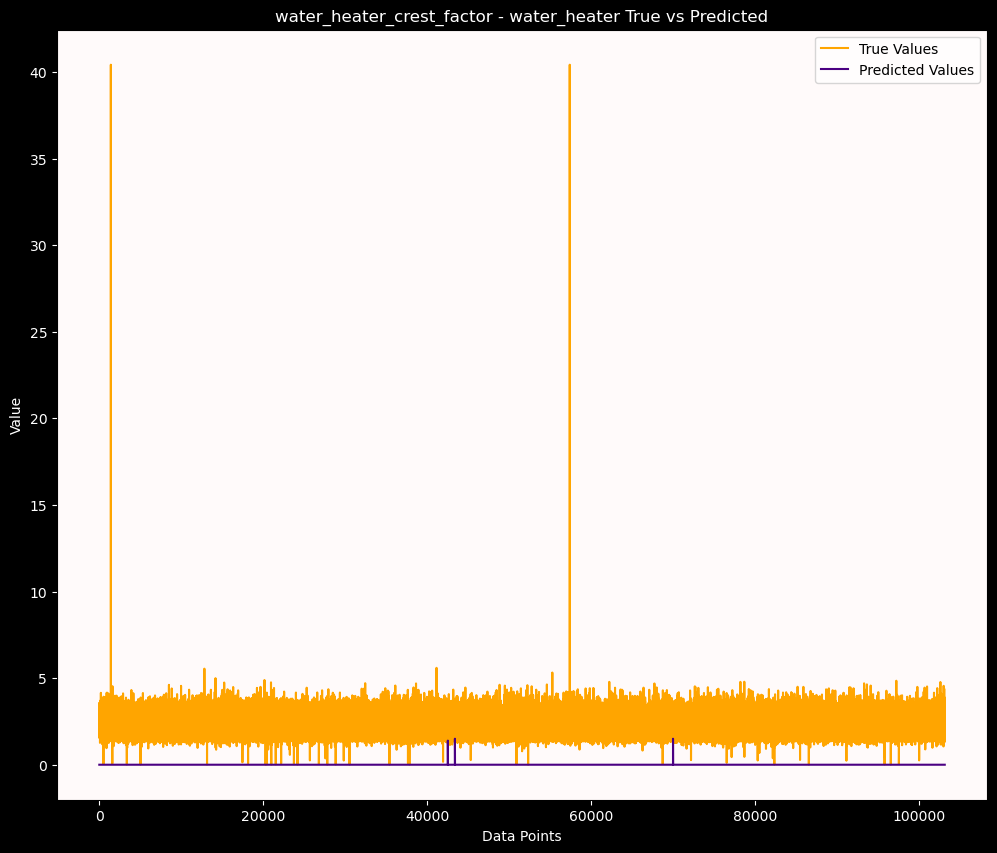

In [13]:
## WATER HEATER ##



X_water_heater = water_heater_data[aggregated_features].values
Y_water_heater = water_heater_data[water_heater_features].values

X_train_water_heater, X_test_water_heater, Y_train_water_heater, Y_test_water_heater = train_test_split(X_water_heater, Y_water_heater, test_size=0.2, random_state=42)

hart85_disaggregator_water_heater = Hart85(num_states=5, num_cluster_init=10, num_cycles_init=5, num_cluster=5)
hart85_disaggregator_water_heater.train(X_train_water_heater)

disaggregated_data_water_heater = hart85_disaggregator_water_heater.disaggregate(X_test_water_heater)

for i, feature in enumerate(water_heater_features):
    true_values = Y_test_water_heater[:, i]
    pred_values = disaggregated_data_water_heater[:, i]
    
    rmse = hart85_disaggregator_water_heater.calculate_rmse(true_values, pred_values)
    mse = hart85_disaggregator_water_heater.calculate_mse(true_values, pred_values)
    rmae = hart85_disaggregator_water_heater.calculate_rmae(true_values, pred_values)
    mae = hart85_disaggregator_water_heater.calculate_mae(true_values, pred_values)
    r2 = r2_score(true_values, pred_values)
    
    print(f"Metrics for {feature}:")
    print("RMSE:", rmse)
    print("MSE:", mse)
    print("RMAE:", rmae)
    print("MAE:", mae)
    print("R2:", r2)
    print()
    
    
import matplotlib.pyplot as plt

# Plotting the predicted values against the true values for each column
for i in range(Y_test_water_heater.shape[1]):
    column_name = water_heater_features[i]
    column_true = Y_test_water_heater[:, i]
    column_pred = disaggregated_data_water_heater[:, i]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    fig.patch.set_facecolor('black')
    
    ax.plot(column_true, label="True Values", color='orange')
    ax.plot(column_pred, label="Predicted Values", color='indigo')
    ax.set_xlabel("Data Points", color='white')
    ax.set_ylabel("Value", color='white')
    ax.set_title(column_name + " - water_heater True vs Predicted", color='white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.legend()
    
    # Change the color of the plot background
    ax.set_facecolor('snow')
    
    plt.show()

